In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import folium
import py3dep
import xarray as xr
import matplotlib.pyplot as plt

import os
os.environ["HYRIVER_CACHE_EXPIRE"] = "7200"


In [2]:
RES = 10
BUFF = 500

In [3]:
path_to_thucs = '../../inputs/thucs/tophuc_S_M_40000_closed_holes_with_container_thuc_merged_bbox_area_first_kept.gpkg'
path_to_thucs_error_3063 = '../../inputs/topagnps/error_3063/error_3063.csv'

In [4]:
thucs_with_errors = pd.read_csv(path_to_thucs_error_3063, dtype={'thuc': str, 'row': int, 'col': int}) 

In [5]:
thucs = gpd.read_file(path_to_thucs)

In [6]:
def download_thuc_id_dem(thuc_id, thucs, res=RES, buff=BUFF):
    thuc = thucs[thucs['tophucid'] == thuc_id]

    output_crs = thuc.estimate_utm_crs()
    gdf_buffered = thuc.to_crs(output_crs).buffer(buff).to_crs("epsg:4326")

    bbox = gdf_buffered.bounds

    dem = py3dep.get_map("DEM", (bbox['minx'].values[0],
                                 bbox['miny'].values[0],
                                 bbox['maxx'].values[0],
                                 bbox['maxy'].values[0]), resolution=res, geo_crs="epsg:4326", crs="epsg:4326")
    return dem, thuc

In [7]:
def get_error_3063_lon_lat(thuc_id, thucs_with_errors, dem):
    row = thucs_with_errors[thucs_with_errors['thuc'] == thuc_id]['row'].values[0]+1
    col = thucs_with_errors[thucs_with_errors['thuc'] == thuc_id]['column'].values[0]+1

    lon, lat = dem.x.values[col], dem.y.values[row]
    return lon, lat, row, col

In [8]:
# Same but with static raster plot of dem

def plot_dem(dem, thuc, lon, lat, row, col, figsize=(15, 15)):

    # Get 98% and 2% percentile of elevation to set the colorbar
    vmin = np.quantile(dem.values, 0.02)
    vmax = np.quantile(dem.values, 0.98)

    fig, ax = plt.subplots(1,1, figsize=figsize, facecolor='white')
    dem.plot(ax=ax, cmap='terrain', vmin=vmin, vmax=vmax)
    
    # ax.clim(vmin=vmin, vmax=vmax)

    # plot only contour of thuc
    thuc.plot(ax=ax, edgecolor='black', facecolor='none')
    ax.plot(lon, lat, 'ro')

    ax.set_title(f"DEM of THUC {thuc['tophucid'].values[0]} with point generating error 3063\n(row: {row}, col: {col} and lon: {lon:04f}, lat: {lat:04f})")
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    # plt.show()
    
    return fig, ax

---1175---
Error 3063 is at lon: -91.81276484404806, lat: 30.880857748647585
Plotting DEM of THUC 1175...
Saving figure of THUC 1175...
---1180---
Error 3063 is at lon: -92.63035767434802, lat: 30.373494569610646
Plotting DEM of THUC 1180...
Saving figure of THUC 1180...
---1250---
Error 3063 is at lon: -97.30092649095947, lat: 49.16141488898686
Plotting DEM of THUC 1250...
Saving figure of THUC 1250...
---1453---
Error 3063 is at lon: -93.48368426621523, lat: 36.75947725304736
Plotting DEM of THUC 1453...
Saving figure of THUC 1453...
---1739---
Error 3063 is at lon: -97.37693310050888, lat: 27.087415581281405
Plotting DEM of THUC 1739...
Saving figure of THUC 1739...
---2509---
Error 3063 is at lon: -114.26322689524221, lat: 48.17643220954032
Plotting DEM of THUC 2509...
Saving figure of THUC 2509...
---2605---
Error 3063 is at lon: -116.9325013435107, lat: 50.17462993567815
Plotting DEM of THUC 2605...
Saving figure of THUC 2605...
---2876---
Error 3063 is at lon: -124.2068365747767

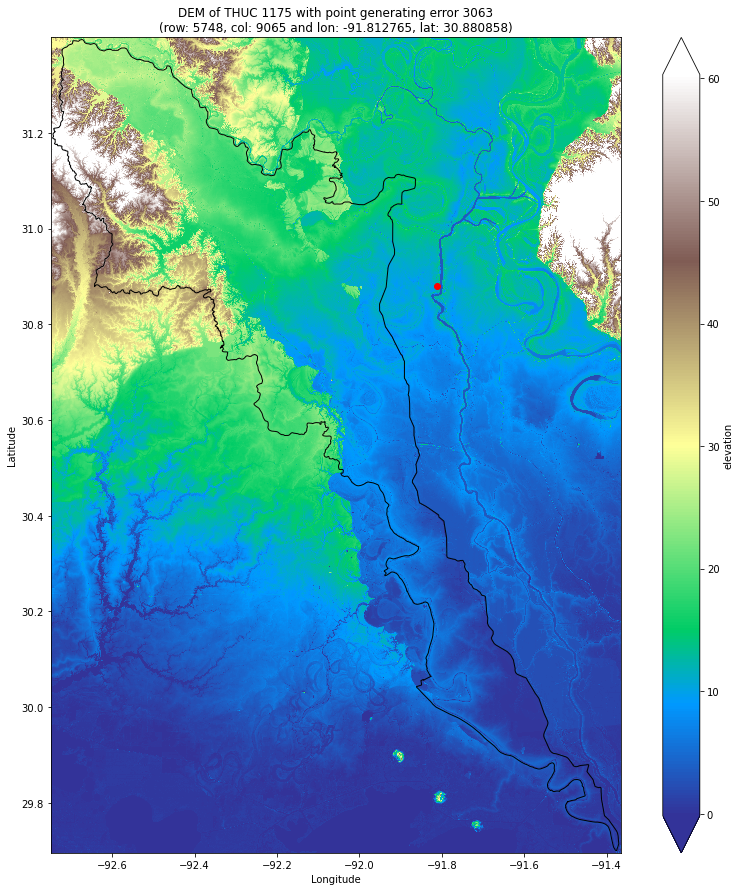

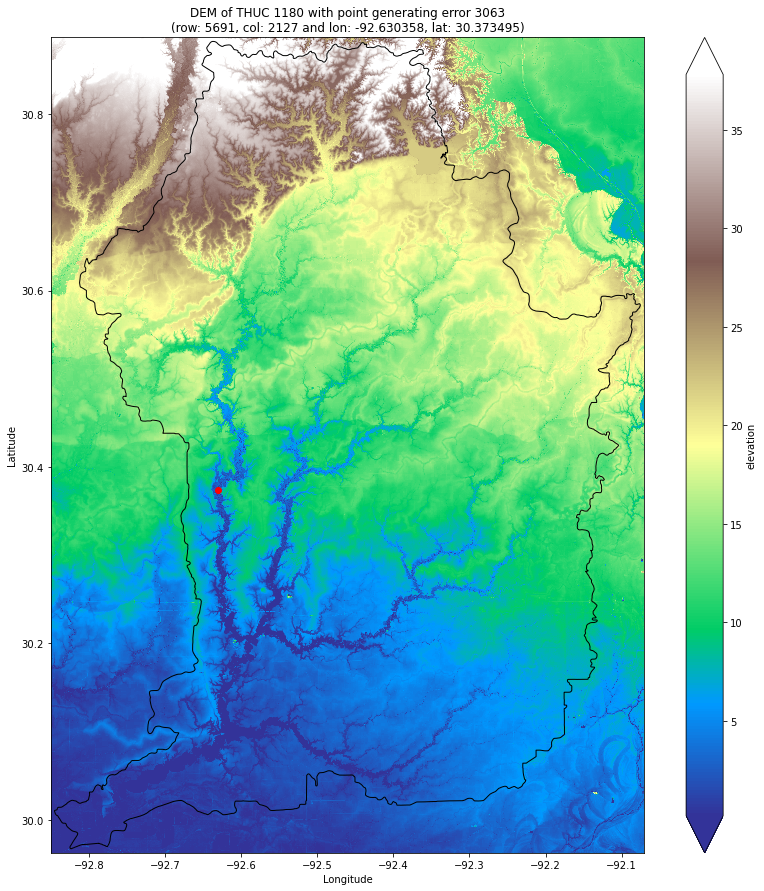

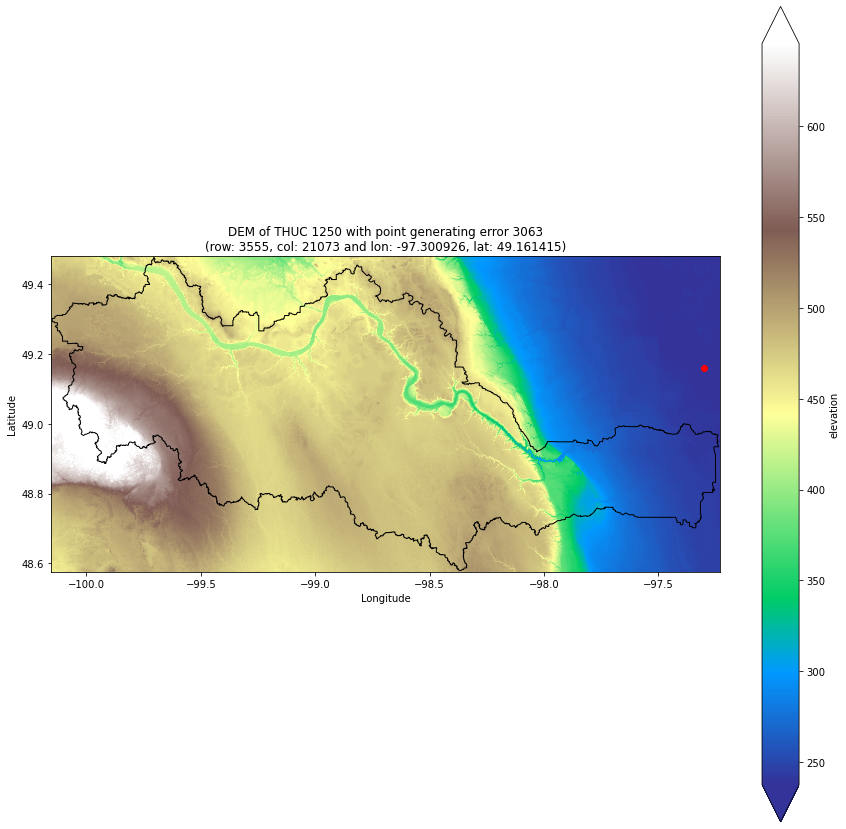

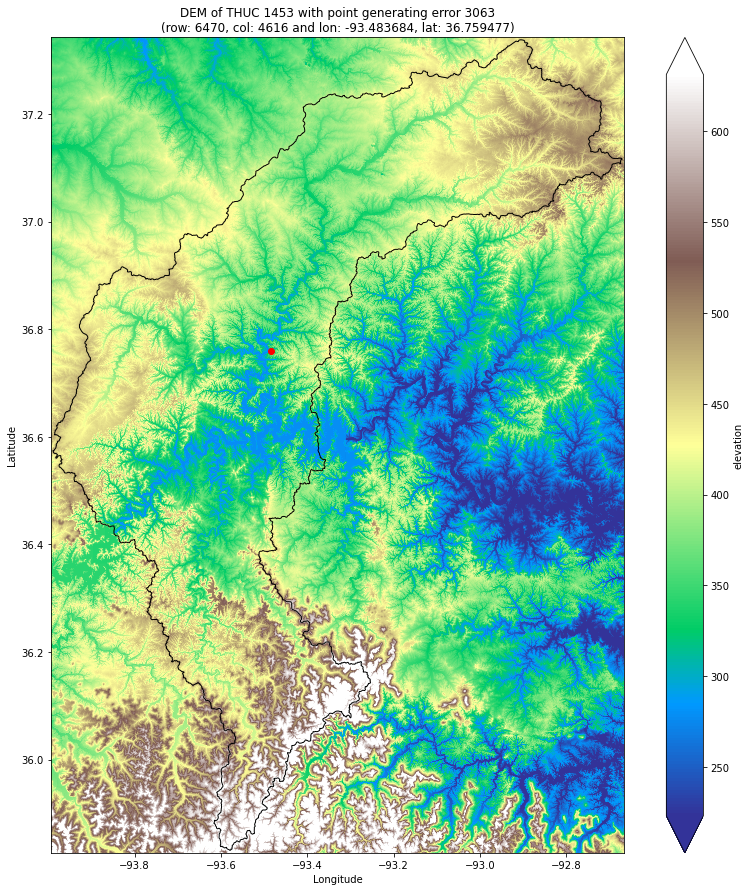

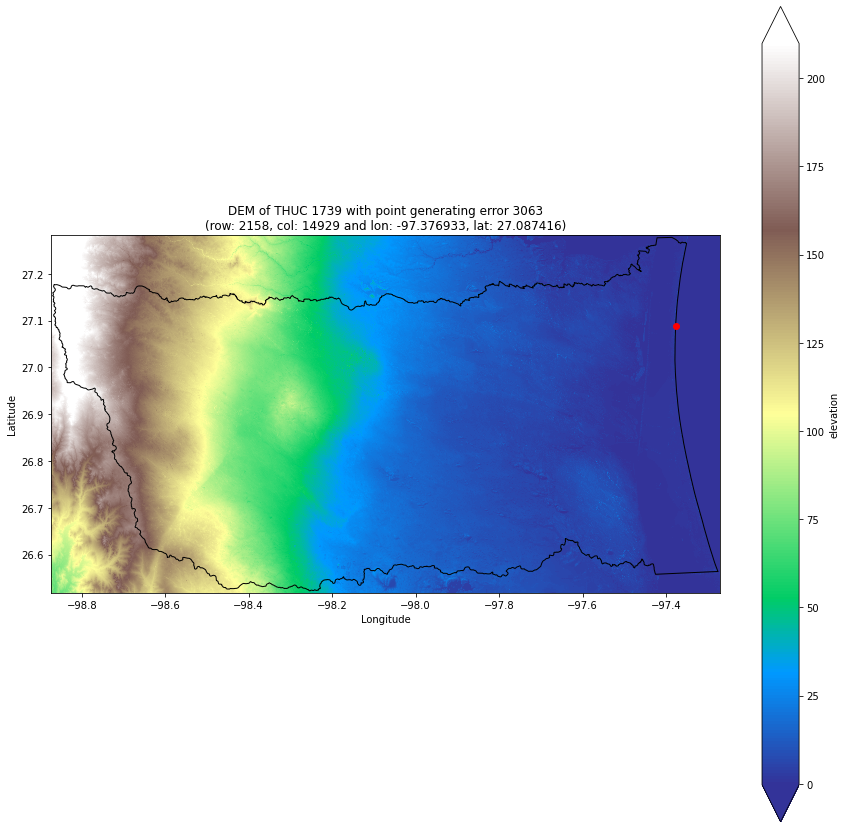

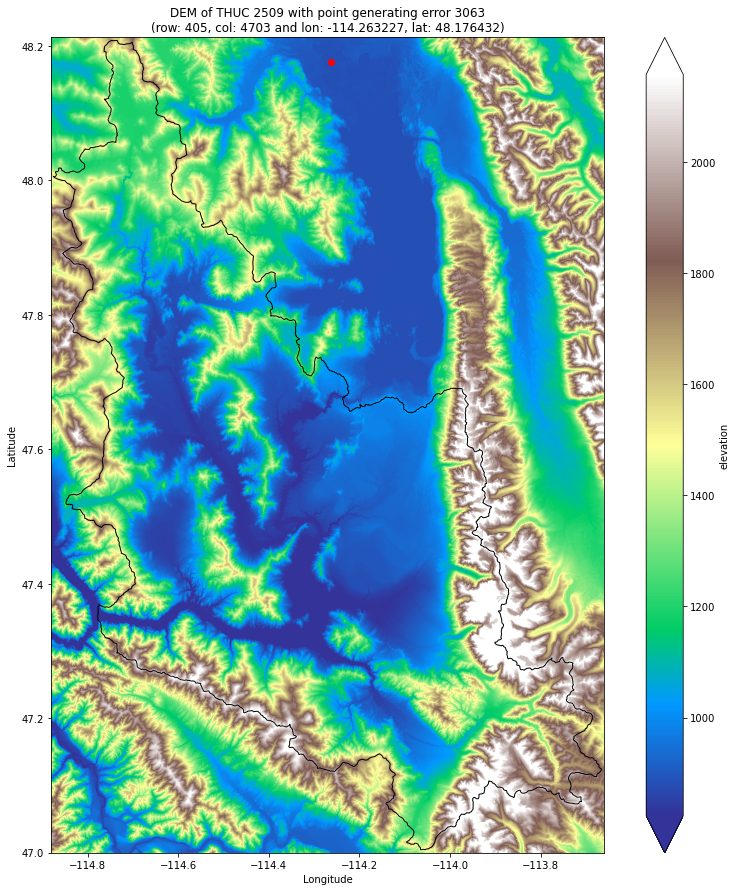

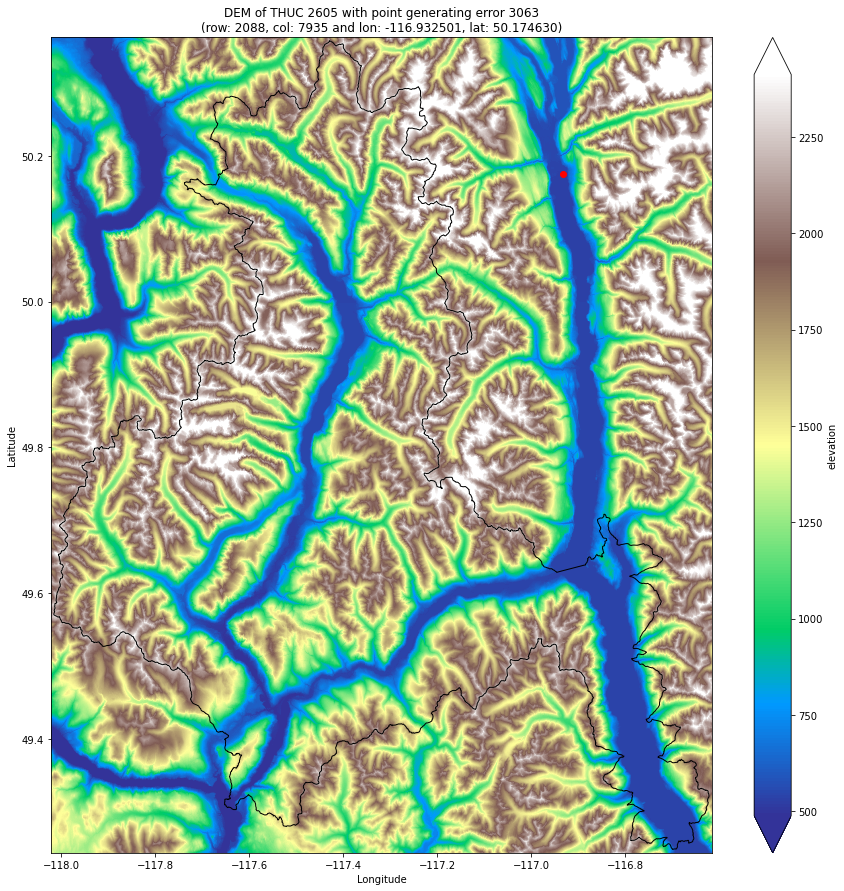

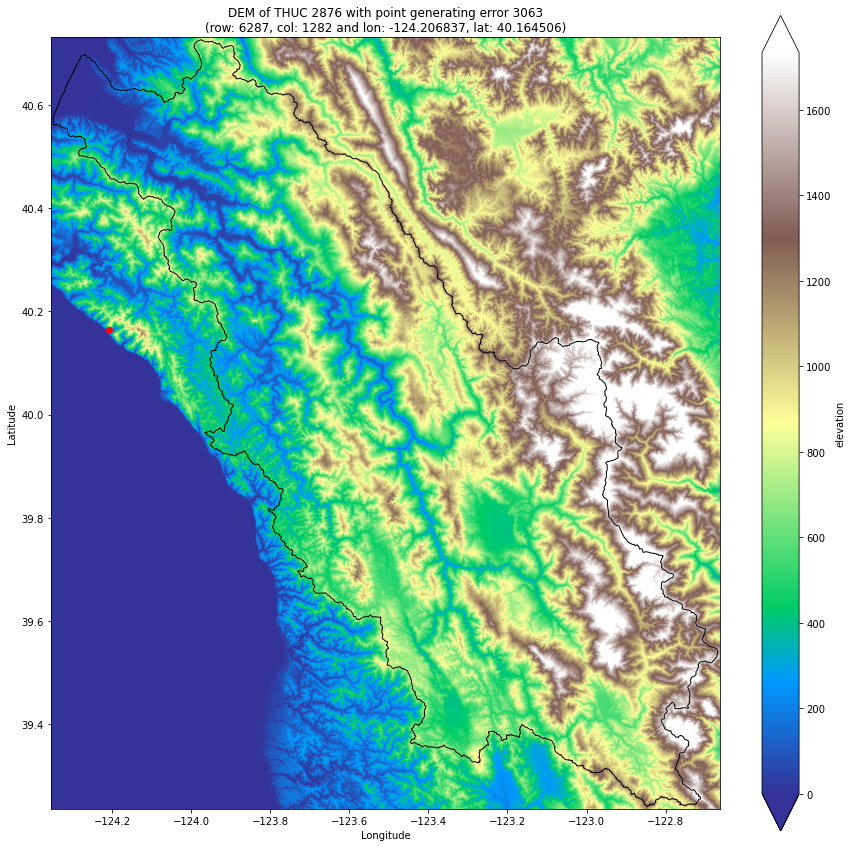

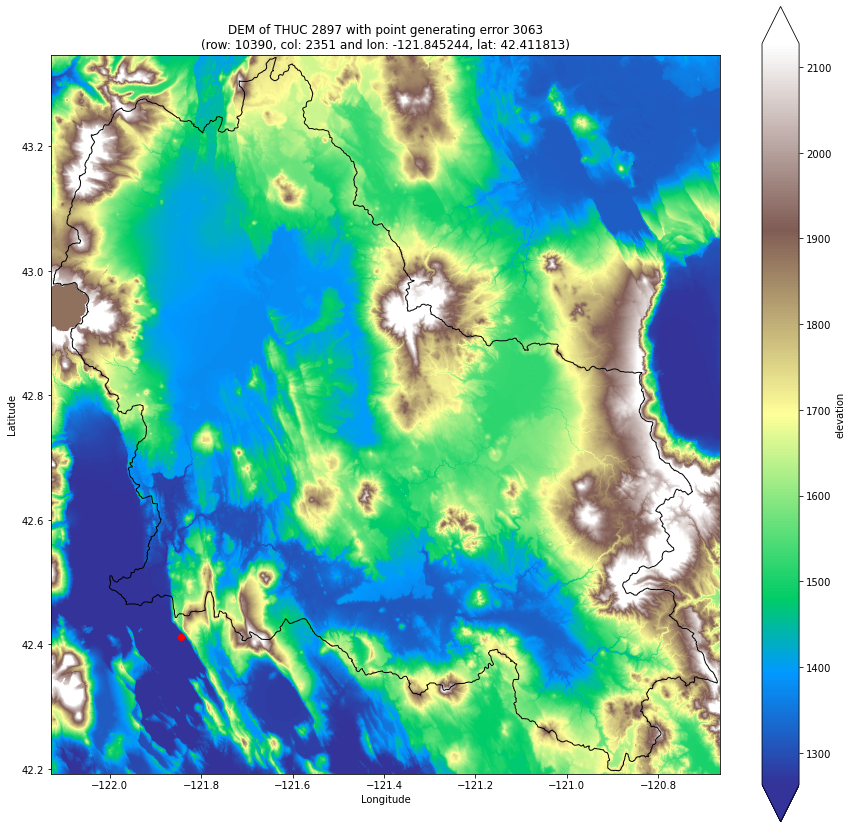

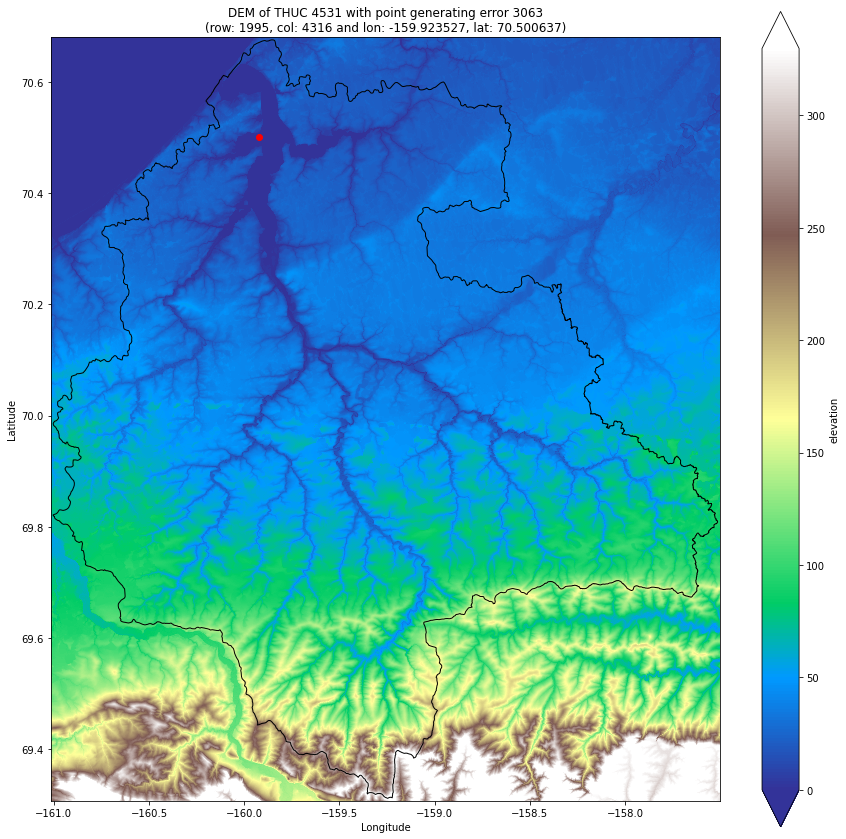

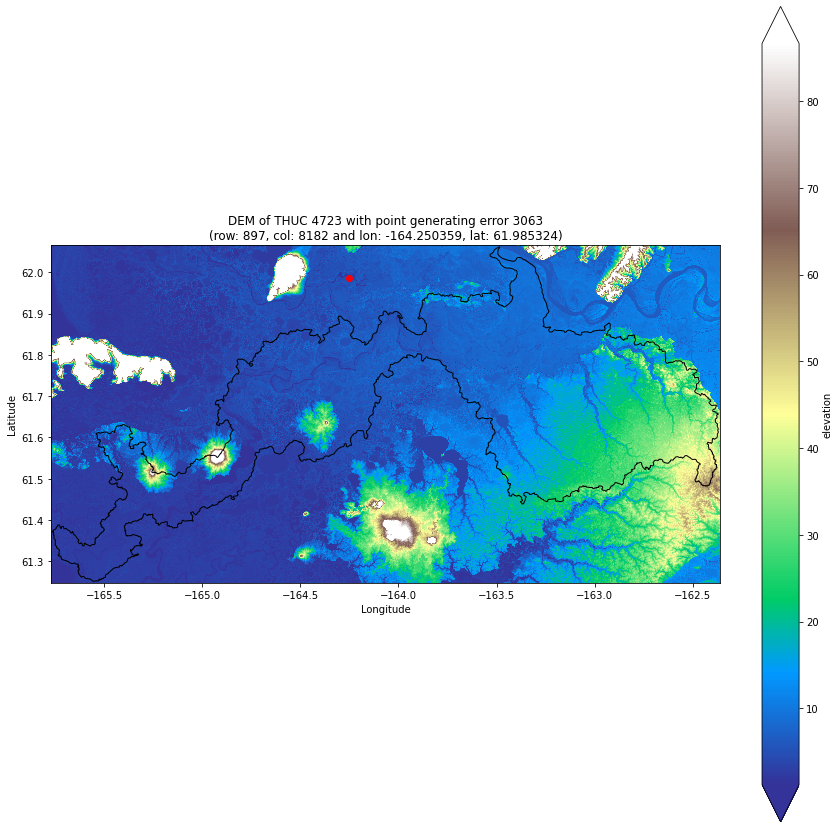

In [9]:
done_list = ['0217', '0234', '0308', '0571', '0773', '0939', '0955', '0968', '0970', '1127']

for terr in thucs_with_errors.iterrows():

    thuc_id = terr[1]['thuc']

    if thuc_id in done_list:
        continue

    print(f'---{thuc_id}---')

    print(f'Downloading DEM of THUC {thuc_id}...')
    dem, thuc = download_thuc_id_dem(thuc_id, thucs)

    lon, lat, row, col = get_error_3063_lon_lat(thuc_id, thucs_with_errors, dem)
    print(f'Error 3063 is at lon: {lon}, lat: {lat}')

    print(f'Plotting DEM of THUC {thuc_id}...')
    fig, ax = plot_dem(dem, thuc, lon, lat, row, col)

    print(f'Saving figure of THUC {thuc_id}...')
    fig.savefig(f'../../outputs/topagnps/error_3063/dem_thuc_{thuc_id}.png', dpi=300)